In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,ttest_rel
from scipy import stats

In [2]:
ws=pd.read_csv('train_titanic.csv')

# Data Review

In [3]:
ws.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
ws.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
ws['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [7]:
ws['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
ws.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
ws.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


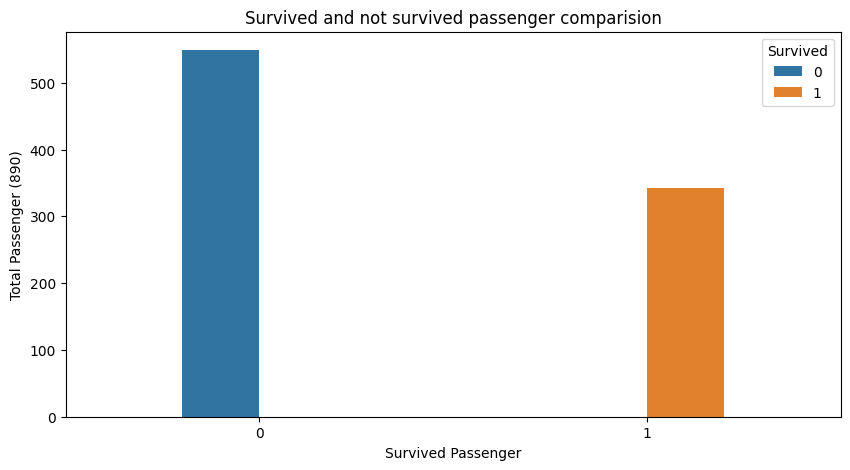

In [11]:
plt.figure(figsize=(10,5))
sn.countplot(x='Survived', data=ws,width=0.4,hue='Survived')

plt.title("Survived and not survived passenger comparision")
plt.xlabel("Survived Passenger")
plt.ylabel("Total Passenger (890)")
plt.show();

In [14]:
ws.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

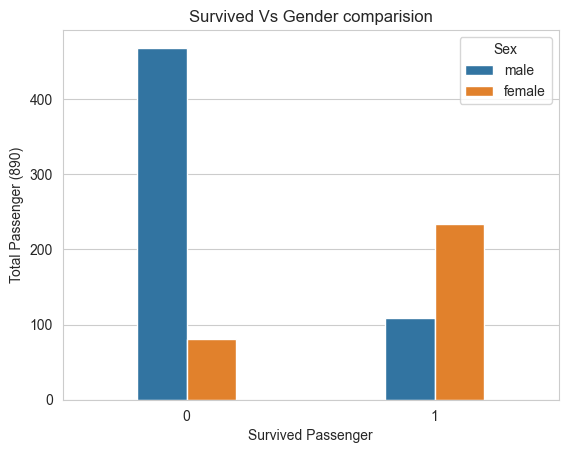

In [15]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Sex',data=ws,width=0.4)

plt.title("Survived Vs Gender comparision")
plt.xlabel("Survived Passenger")
plt.ylabel("Total Passenger (890)")

plt.show()

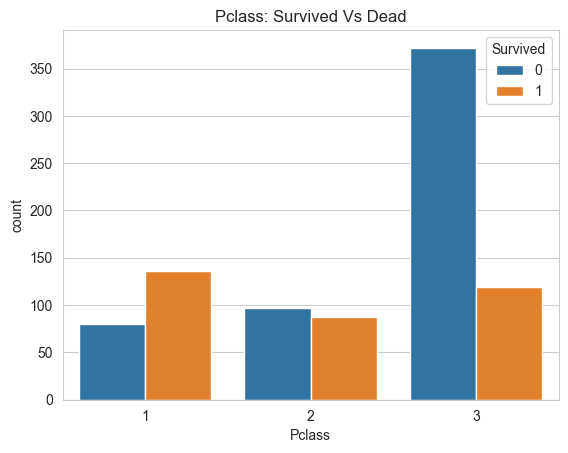

In [16]:
sn.countplot(x='Pclass',hue='Survived',data=ws)
plt.title('Pclass: Survived Vs Dead')
plt.show()

In [17]:
pd.crosstab([ws.Sex,ws.Survived],ws.Pclass,margins=True).style.background_gradient(cmap='summer_r')

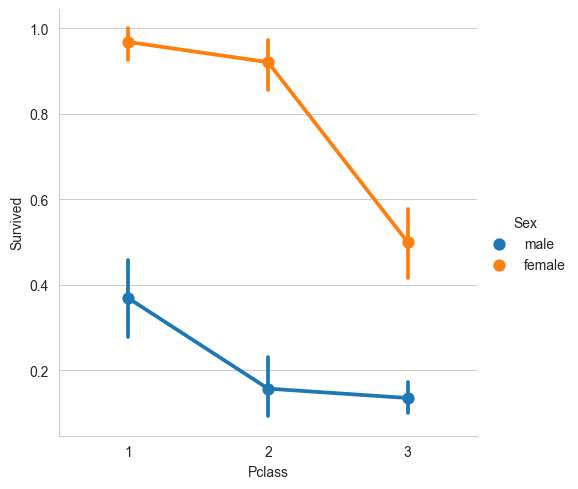

In [18]:
sn.catplot(x='Pclass',y='Survived',hue='Sex',data=ws,kind='point')
plt.show()

In [19]:
print('Oldest Person Survive was of: ',ws[ws['Survived']==1]['Age'].max())
print('Youngest Person Survive was of: ',ws[ws['Survived']==1]['Age'].min())
print('Average Person Survive was of: ',ws[ws['Survived']==1]['Age'].mean())

Oldest Person Survive was of:  80.0
Youngest Person Survive was of:  0.42
Average Person Survive was of:  28.343689655172415


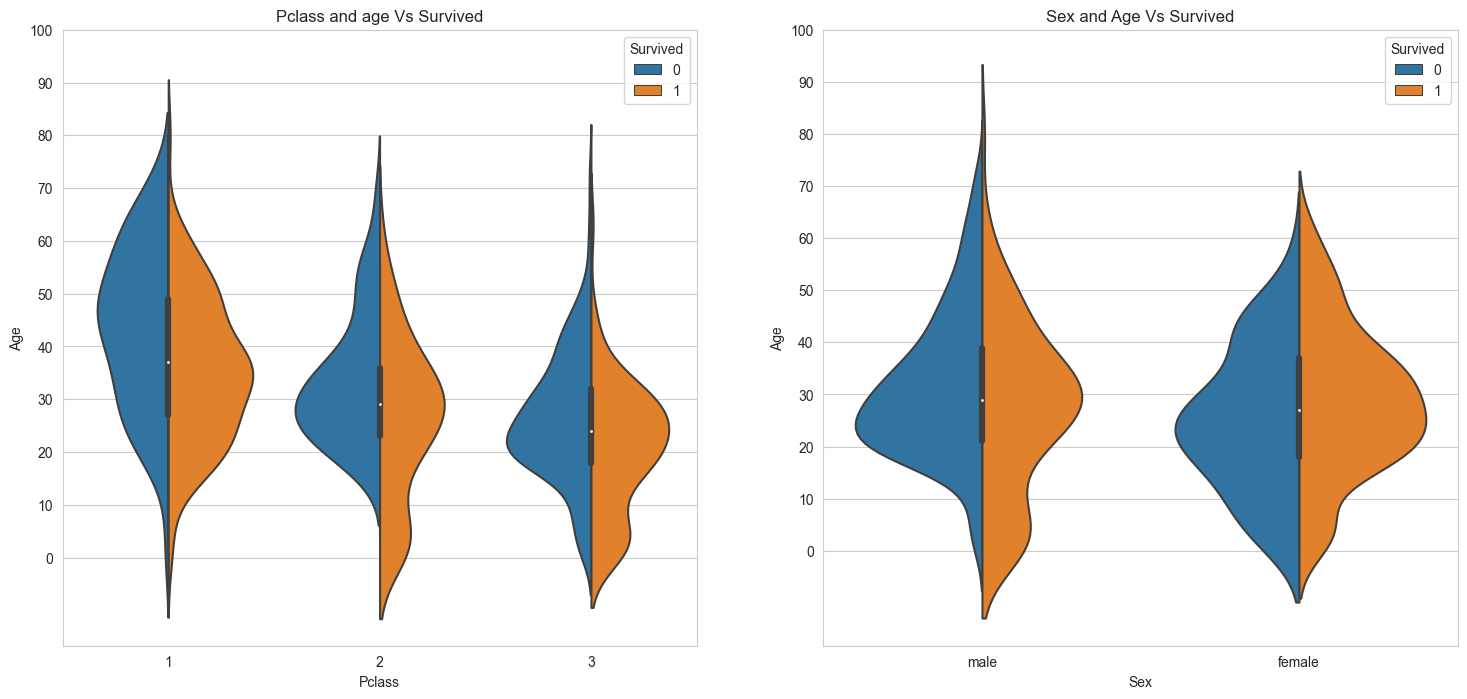

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sn.violinplot(x='Pclass',y='Age',hue='Survived',data=ws,split=True,ax=ax[0])
ax[0].set_title('Pclass and age Vs Survived')
ax[0].set_yticks(range(0,110,10))


sn.violinplot(x='Sex',y='Age',hue='Survived',   data=ws,  split=True,  ax=ax[1])
ax[1].set_title('Sex and Age Vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [21]:
ws['Initial']=0
for i in ws:
    ws['Initial']=ws.Name.str.extract('([A-Za-z]+)\.')
    

In [22]:
ws.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [23]:
pd.crosstab(ws.Initial,ws.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [24]:
ws['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [25]:
ws.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [26]:
ws.loc[(ws.Age.isnull())&(ws.Initial=='Mr'),'Age']=33
ws.loc[(ws.Age.isnull())&(ws.Initial=='Mrs'),'Age']=36
ws.loc[(ws.Age.isnull())&(ws.Initial=='Master'),'Age']=5
ws.loc[(ws.Age.isnull())&(ws.Initial=='Miss'),'Age']=22
ws.loc[(ws.Age.isnull())&(ws.Initial=='Others'),'Age']=46

In [27]:
ws.Age.isnull().any()

False

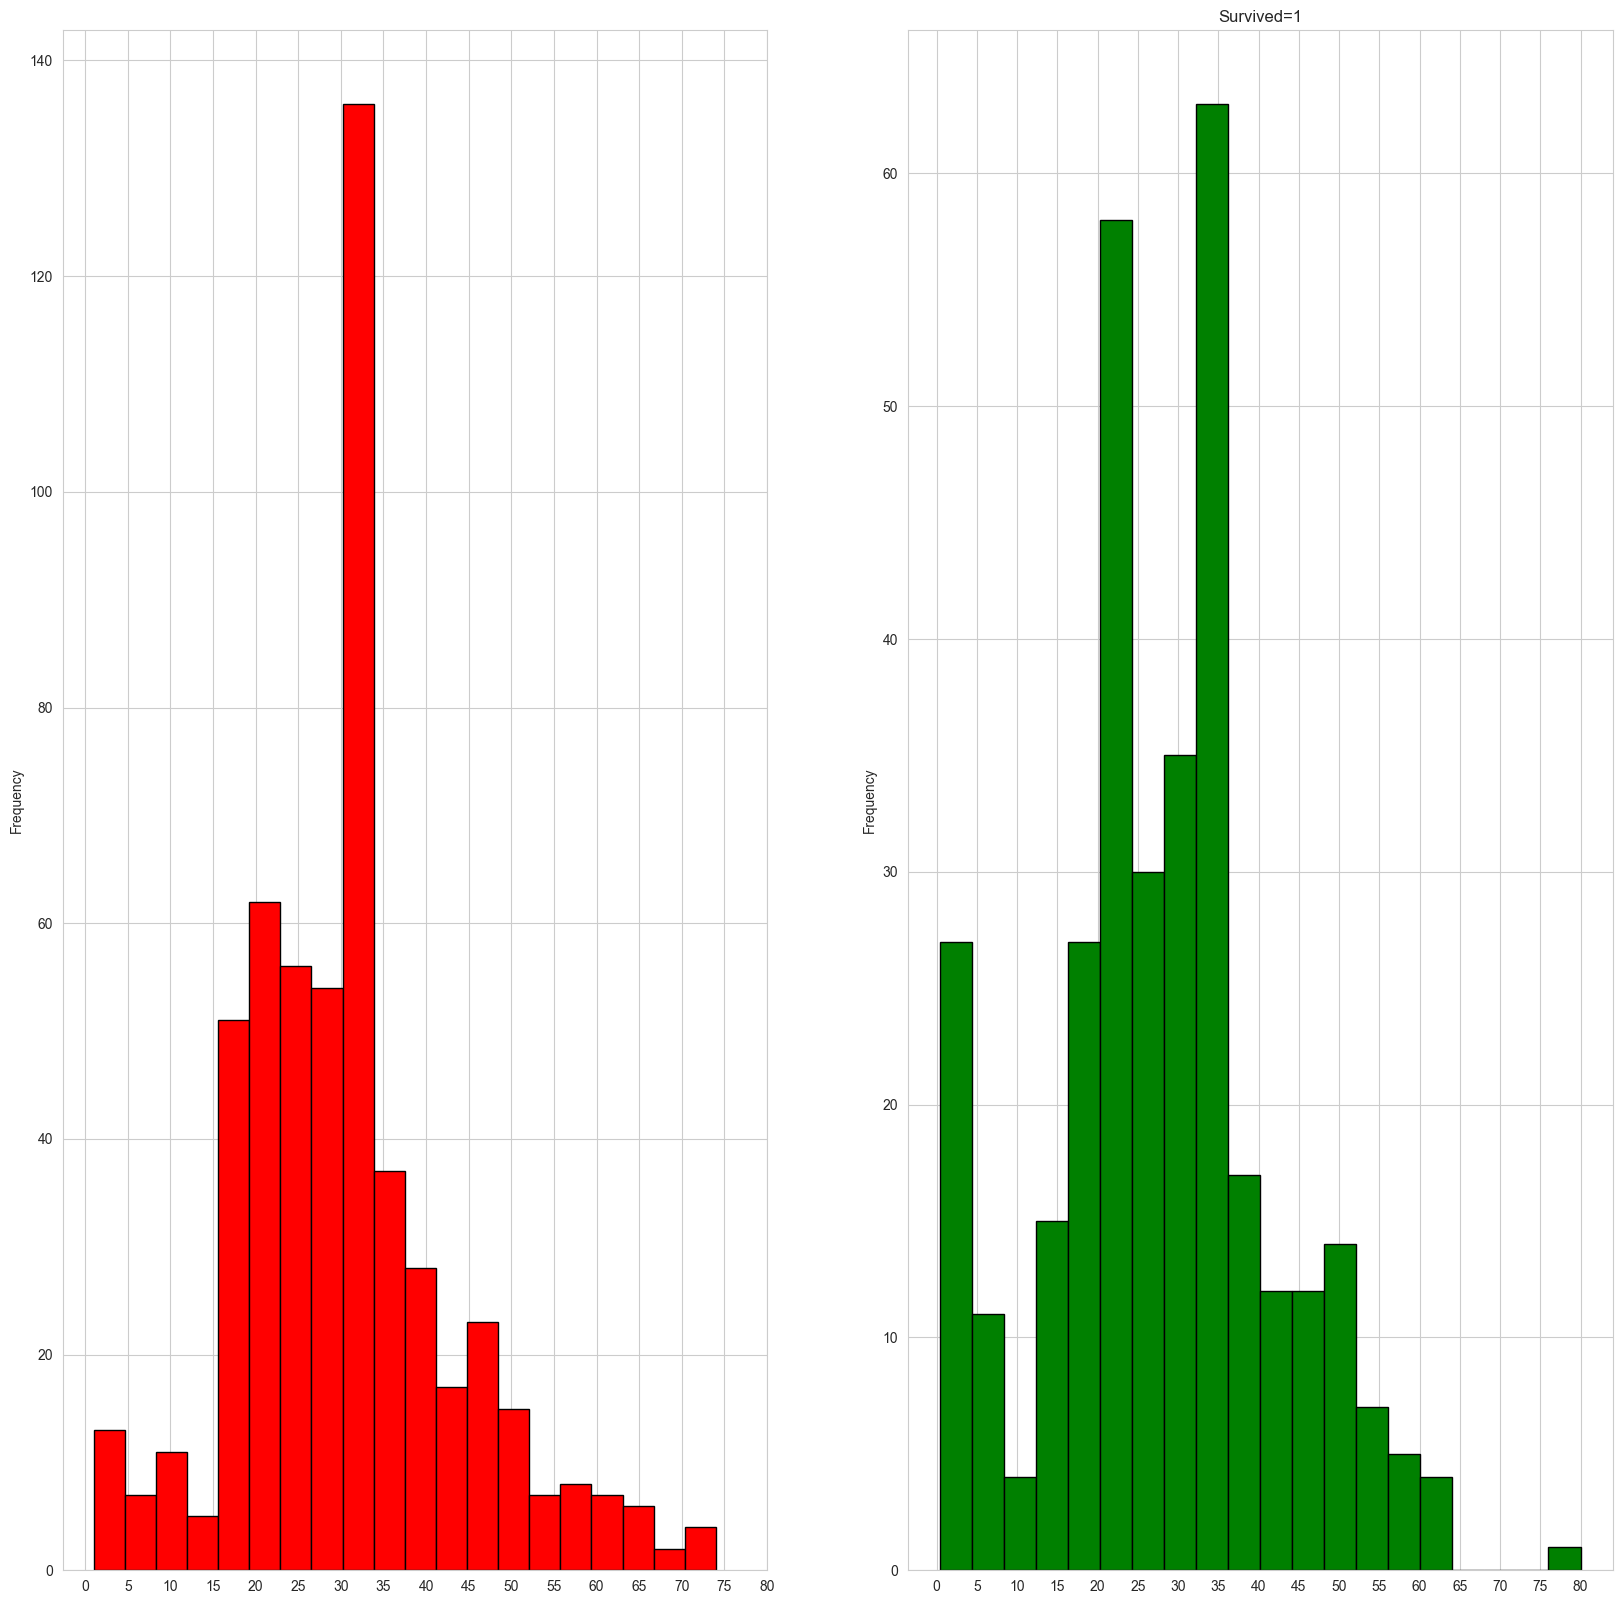

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,20))
ws[ws['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

ws[ws['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

ax[1].set_title('Survived=1')
plt.show();

<Figure size 2000x1500 with 0 Axes>

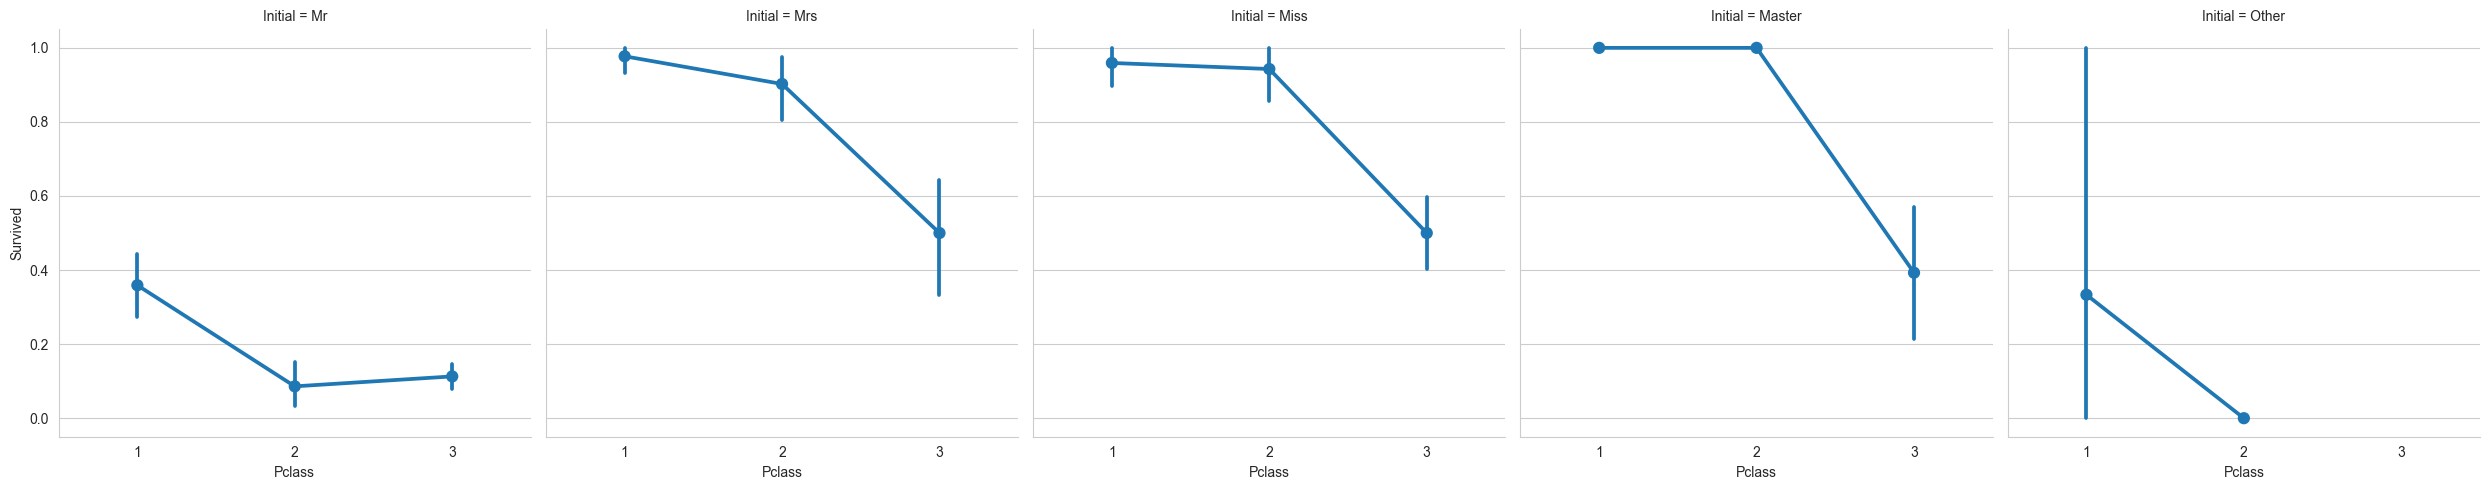

In [29]:
plt.figure(figsize=(20,15))
sn.catplot(x='Pclass',y='Survived',col='Initial', data=ws, kind='point')
plt.show()

## Sib SIp:


In [30]:
pd.crosstab([ws.SibSp],ws.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: >

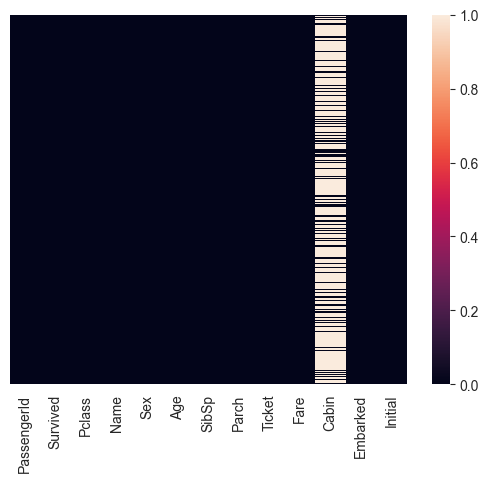

In [34]:
sn.heatmap(ws.isnull(),yticklabels=False)

## Summary:

#### some observations in heatmap chart are:
There are many null values in column Age and Cabin.

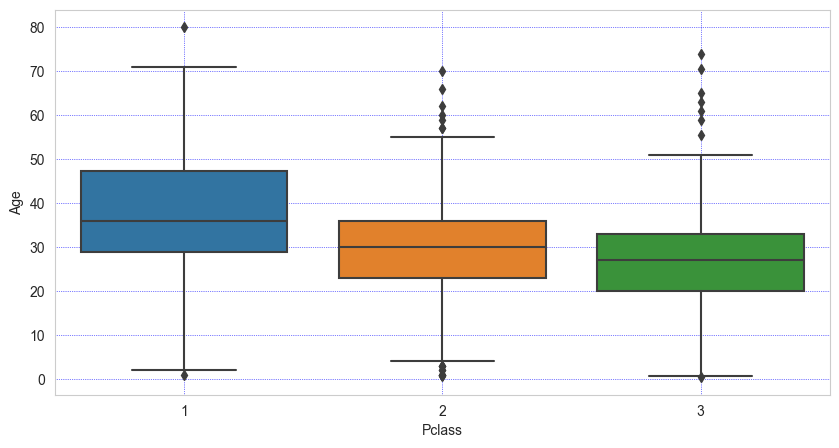

In [36]:
plt.figure(figsize=(10,5))
sn.boxplot(x='Pclass',y='Age',data=ws)
plt.grid(color='b',linestyle=':',linewidth=0.5)
plt.show()

## Summary:

In this above box plot, we can see there are many outliers on passenger class 2 and Passenger class 3 But there is no any outliers in Passenger class 1. 

#### some observations are:
1. Median age of passenger who are travelling in Pclass 1 type ticket is around 37.  
2. Median age of passenger who are travelling in Pclass 2 type ticket is around 28.
3. Median age of passenger who are travelling in Pclass 3 type ticket is around 24.

In [37]:
ws['Age']=ws['Age'].fillna("NOT")
ws

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [38]:
ws

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


## Data Cleaning 

In this above box plot, we can see there are many outliers on passenger class 2 and Passenger class 3 But there is no any outliers in Passenger class 1. 

#### some observations are:
1. Median age of passenger who are travelling in Pclass 1 type ticket is around 37.  
2. Median age of passenger who are travelling in Pclass 2 type ticket is around 28.
3. Median age of passenger who are travelling in Pclass 3 type ticket is around 24.

In [39]:
ws

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [40]:
ws['Age'].isnull().sum()

0

#### Now there are no any null in Age attributes.

<Axes: >

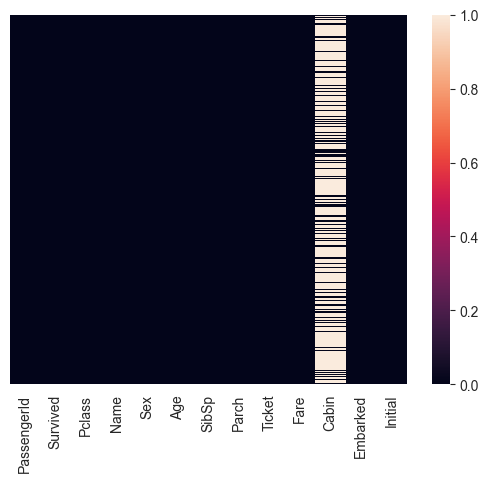

In [41]:
sn.heatmap(ws.isnull(),yticklabels=False)

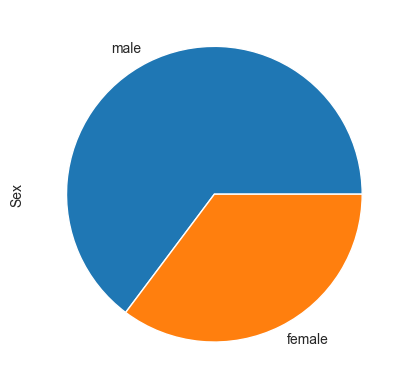

In [42]:
ws.Sex.value_counts().plot(kind='pie')
plt.show()

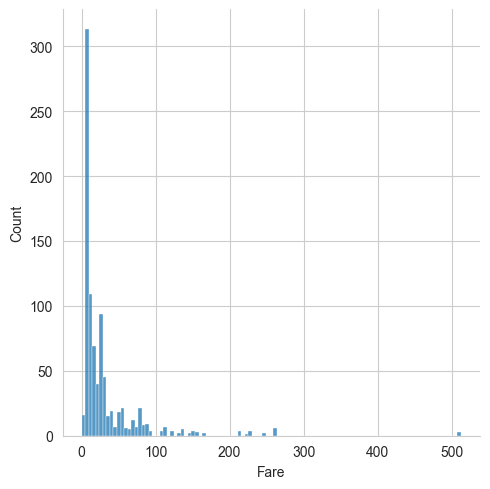

In [43]:
sn.displot(ws.Fare)
plt.show()

## Passenger Survived Vs Not Survived summary

In this chart it is clear that numner of not survived passenger are huge compare to survived.
* Around 550 passengers were not servived.
* Around 340 passengers were servived.

## Male Passengers death count was high


In [ ]:
plt.figure(figsize=(10,5))
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Pclass',data=ws,width=0.6)

plt.title("Survived Vs Passenger Class comparision")
plt.xlabel("Survived Passenger")
plt.ylabel("Total Passenger (890)")
plt.show()


## Passenger Survived according to passenger class ticket

#### In not survived category:
Passenger on 3rd class ticket died more compare to other category
After 3rd class passenger, 2nd class passenger were died more and after that class 1 passenger

#### Similiarly in  survived category:
maximum class 1 passenger were servived and after that class 2 and class 3.

### Conclusion:
Passenger travelling on low class were died more.

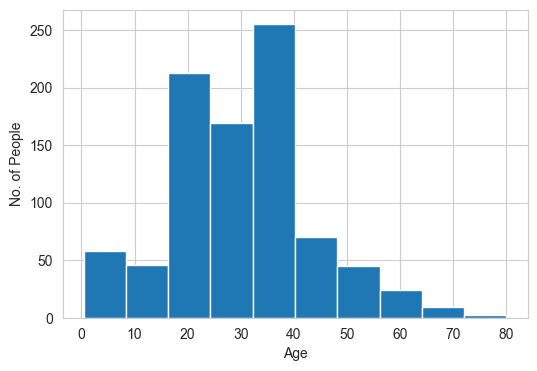

In [47]:
ws['Age'].hist(figsize=(6,4))


plt.xlabel('Age')
plt.ylabel('No. of People')
plt.show()

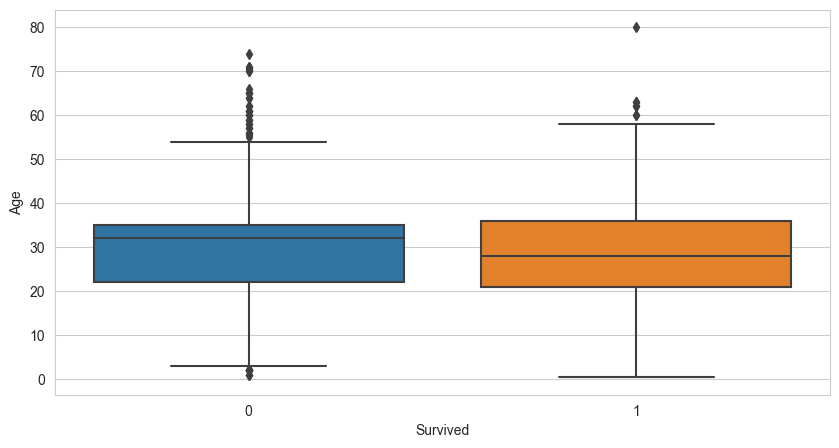

In [48]:
fig = plt.figure(figsize=(10,5))
sn.boxplot(x='Survived', y = 'Age',data=ws)
plt.show()

Text(0, 0.5, 'Total Passenger (890)')

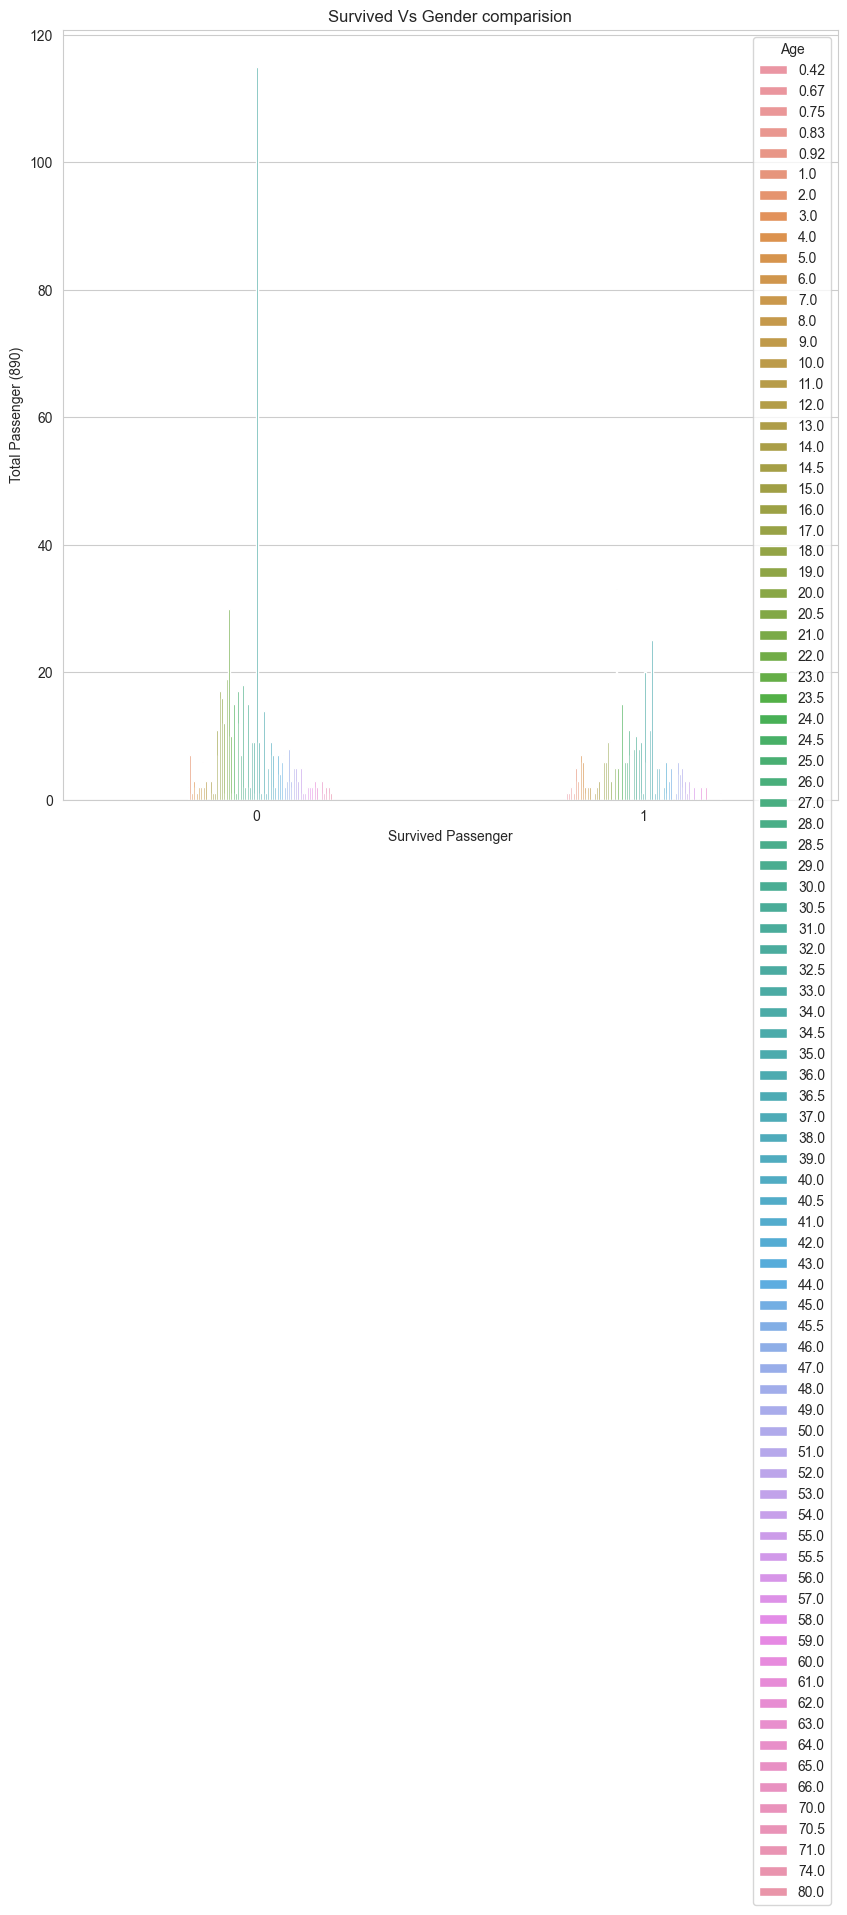

In [49]:
plt.figure(figsize=(10,10))
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Age',data=ws,width=0.4)

plt.title("Survived Vs Gender comparision")
plt.xlabel("Survived Passenger")
plt.ylabel("Total Passenger (890)")


#### Summary:
#### In total number of death passenger male count was high 

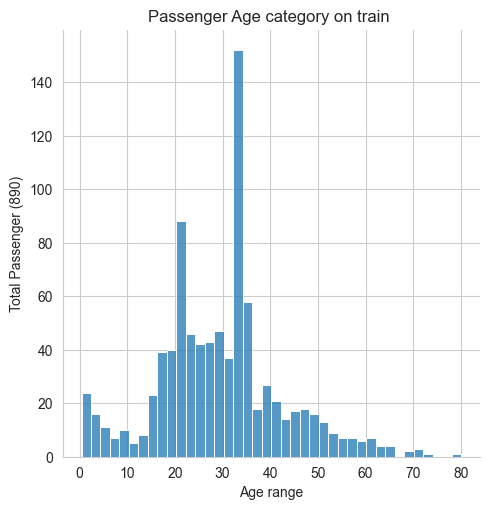

In [44]:
sn.displot(ws['Age'].dropna(),kde=False,bins=40)

plt.title("Passenger Age category on train ")
plt.xlabel("Age range")
plt.ylabel("Total Passenger (890)")
plt.show();

<Axes: >

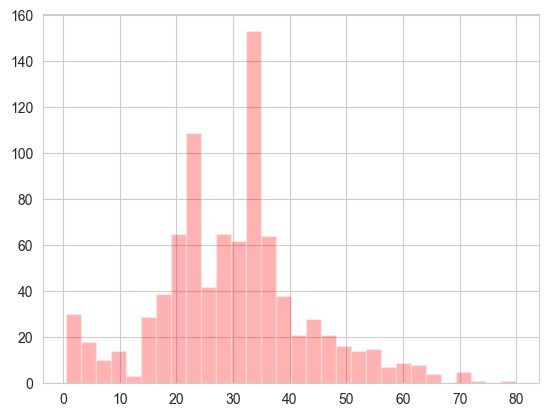

In [45]:
ws['Age'].hist(color='Red',alpha=0.3,bins=30)

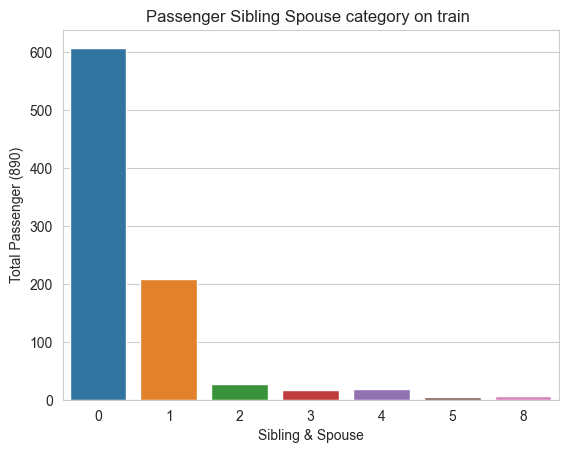

In [46]:
ax = sn.countplot(x='SibSp',data=ws)

plt.title("Passenger Sibling Spouse category on train ")
plt.xlabel("Sibling & Spouse")
plt.ylabel("Total Passenger (890)")
plt.show()